In [20]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

../output_perspective/cor1_st_2489428266_b_reg_.fits
st_2489428266_b
429
3817


ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

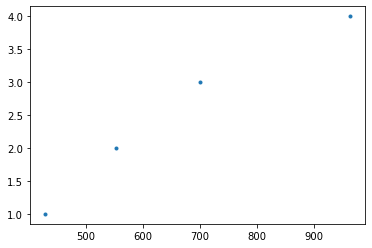

In [19]:
target_files = "../output_perspective/cor*.fits"

image_files = sorted(glob.glob(target_files))

wave_length = [429, 553, 700, 963]
ref = [1,2,3,4]
plt.scatter(wave_length, ref, marker = ".")

for i, image_file in enumerate(image_files):
    print(image_file)
    parts = image_file.split("cor1_")
    part = parts[1].split("_reg_")
    name = f"{part[0]}"
    f = fits.getdata(image_file)
    print(name)
    print(wave_length[i])
    print(f[133][125])
    data = [f[133][125], f[199][152]]
    plt.plot(wave_length[i], data, label = name)

plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()


In [ ]:
target_files = "../output_perspective/cor*.fits"

image_files = sorted(glob.glob(target_files))

wave_length = [429, 553, 700, 963]
ref = [1,2,3,4]
plt.scatter(wave_length, ref, marker = ".")

for i, image_file in enumerate(image_files):
    print(image_file)
    parts = image_file.split("cor1_")
    part = parts[1].split("_reg_")
    name = f"{part[0]}"
    f = fits.getdata(image_file)
    print(name)
    print(wave_length[i])
    print(f[133][125])
    data = [f[133][125], f[199][152]]
    plt.plot(wave_length[i], data, label = name)

plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()

In [36]:
target_files = "../output_perspective/cor*.fits"

image_files = sorted(glob.glob(target_files))
print(image_files)
wave_length = [429, 553, 700, 963]

['../output_perspective/cor1_st_2489428266_b_reg_.fits', '../output_perspective/cor1_st_2489432123_v_reg_.fits', '../output_perspective/cor1_st_2489436012_w_reg_.fits', '../output_perspective/cor1_st_2489439885_p_reg_.fits']


In [34]:
image_files
df_b = pd.DataFrame(fits.getdata(image_files[0]))
df_v = pd.DataFrame(fits.getdata(image_files[1]))
df_w = pd.DataFrame(fits.getdata(image_files[2]))
df_p = pd.DataFrame(fits.getdata(image_files[3]))


[1.2969759, 1.0, 0.7115189, 1.4318722]
[1.2796731, 1.0, 0.72245914, 1.5223881]


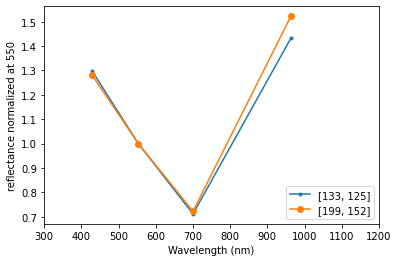

In [40]:
df_b.iloc[133,125]
l1 = [df_b.iloc[133,125] / df_v.iloc[133,125], df_v.iloc[133,125] / df_v.iloc[133,125], df_w.iloc[133,125] / df_v.iloc[133,125], df_p.iloc[133,125] / df_v.iloc[133,125]]
l2 = [df_b.iloc[199,152] / df_v.iloc[199,152], df_v.iloc[199,152] / df_v.iloc[199,152], df_w.iloc[199,152] / df_v.iloc[199,152], df_p.iloc[199,152] / df_v.iloc[199,152]]
print(l1)
print(l2)
plt.plot(wave_length, l1, marker = ".", label = [133,125])
plt.plot(wave_length, l2, marker = "o", label = [199,152])

plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'lower right') 
plt.show()